### Лабораторна робота №5. Алгоритми пошуку. Стратегія "грубої сили". 
## Виконавець: Учень групи КН23-1 Сидоренко Андрій

__Мета.__ _Засвоїти варіанти реалізації алгоритмів пошуку засобами Python і методи оцінки їх складності._ 

Одним з найпростіших алгоритмів пошуку є [_лінійний пошук_](https://uk.wikipedia.org/wiki/%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B8%D0%B9_%D0%BF%D0%BE%D1%88%D1%83%D0%BA). Сенс алгоритму полягає в тому, що пошук починають з першого елементу масива. Якщо поточний елемент списку не дорівнює шуканому значенню, то здійснюється перехід до наступного елементу. Таким чином, у результаті кожної перевірки область пошуку зменшується на один елемент.  

Лінійний пошук також відомий, як _метод перебору_ або "грубої сили". Працює за час $O(n)$, де $n$ -- довжина списку на вході.

## Реалізація лінійного пошуку на Python

In [15]:
# Якщо елемент не буде знайдено, виводиться -1
def linear_search(a_list, x):
    i, length = 0, len(a_list)
    while i < length and x != a_list[i]:
        i += 1
    return i if i < length else -1   

In [ ]:
search_item = int(input("Введіть шуканий елемент: "))

In [3]:
a = [32, 1, 3, 4, 2, 1]
linear_search(a, search_item)

-1

__Завдання на самостійну роботу:__ Оцінити асимптотичну складність алгоритму лінійного пошуку у $О$-нотації.

__Відповідь:__ $O(n)$


## Пошук у відсортованому масиві. Бінарний пошук 

Це класичний алгоритм пошуку елемента у відсортованому списку, який використовує дроблення масиву на половини. Алгоритм можна реалізувати рекурсивно. Нижче наведено [реалізацію](https://github.com/yorko/python_intro) для відсортованих списків без повторюваних елементів. Складність алгоритму - $O(log(n))$, де $n$ - довжина списку на вході.

_[Алгоритм](https://younglinux.info/algorithm/dichotomy) полягає у наступному._

1. Знаходиться середній елемент послідовності. Для цього перший і останній індекси зв'язуються зі змінними, а індекс середнього елемента обчислюється.  

2. Значення середнього елемента порівнюється з шуканим значенням. Залежно від того, більше воно чи менше значення середнього елемента, подальший пошук буде відбуватися тільки в лівій або тільки в правій половинах масиву. Якщо значення середнього елемента виявляється рівним шуканому, пошук завершується.  

3. Інакше одна з меж досліджуваної послідовності зсувається. Якщо шукане значення більше значення середнього елемента, то нижня межа зсувається за середній елемент на один елемент праворуч. Якщо шукане значення менше значення середнього елемента, то верхня межа зсувається на елемент перед середнім.

4. Знову знаходиться середній елемент тепер уже в обраній половині. Описаний вище алгоритм повторюється для даного зрізу.

In [6]:
def bin_search(a_list, x, left, right):
    if left > right or len(a_list) == 0:
        return -1
    middle = (left + right) // 2
    if a_list[middle] == x:
        return middle
    elif (a_list[middle] < x):
        return bin_search(a_list, x, middle + 1, right)
    else:       # a_list[middle] > x
        return bin_search(a_list, x, left, middle - 1)

In [5]:
a = range(7,21)

In [6]:
search_item = int(input("Введіть шуканий елемент: "))

Введіть шуканий елемент: 5


In [7]:
bin_search(a, search_item, 0, len(a) - 1)

-1

__Завдання на самостійну роботу__:

* Оцінити асимптотичну складність алгоритму бінарного пошуку пошуку у $О$-нотації.


__Відповідь:__

Асимптотична складність алгоритму бінарного пошуку= $O(log(n))$, бо він на кожному кроці ділить діапазон пошуку навпіл, а кожен наступний крок скорочує розмір діапазону вдвічі.

* написати функцію, яка б могла повертати датафрейм з наступним складом полів: ("n", "time"), де `n` -- розмір масиву для функції `linear_searh();

__Відповідь:__

In [7]:
def linear_search(a_list, x):
    i, length = 0, len(a_list)
    start_time = time.time() 
    while i < length and x != a_list[i]:
        i += 1
    end_time = time.time()   
    return end_time - start_time  

def measure_linear_search(n):
    a_list = list(range(n)) 
    x = n + 1   
    time_taken = linear_search(a_list, x) 
    return {"n": n, "time": time_taken}

* написати функцію, яка б могла повертати датафрейм з наступним складом полів: ("n", "time"), де `n` -- розмір масиву для функції `bin_searh();

__Відповідь:__

In [12]:
import time
def bin_search(a_list, x, left, right):
    if left > right or len(a_list) == 0:
        return -1
    middle = (left + right) // 2
    if a_list[middle] == x:
        return middle
    elif (a_list[middle] < x):
        return bin_search(a_list, x, middle + 1, right)
    else:     
        return bin_search(a_list, x, left, middle - 1)

def measure_bin_search(n):
    a_list = list(range(n)) 
    x = n + 1               
    left, right = 0, len(a_list) 
    start_time = time.time() 
    bin_search(a_list, x, left, right) 
    end_time = time.time() 
    return {"n": n, "time": end_time - start_time}

* за результатами попередніх завдань побудувати графіки залежності часу виконання процедури пошуку від розміру масиву. Приклад побудови графіків у середовищі `Ipython` можна подивитися [тут](https://devpractice.ru/python-lesson-6-work-in-jupyter-notebook/).  

__Відповідь:__

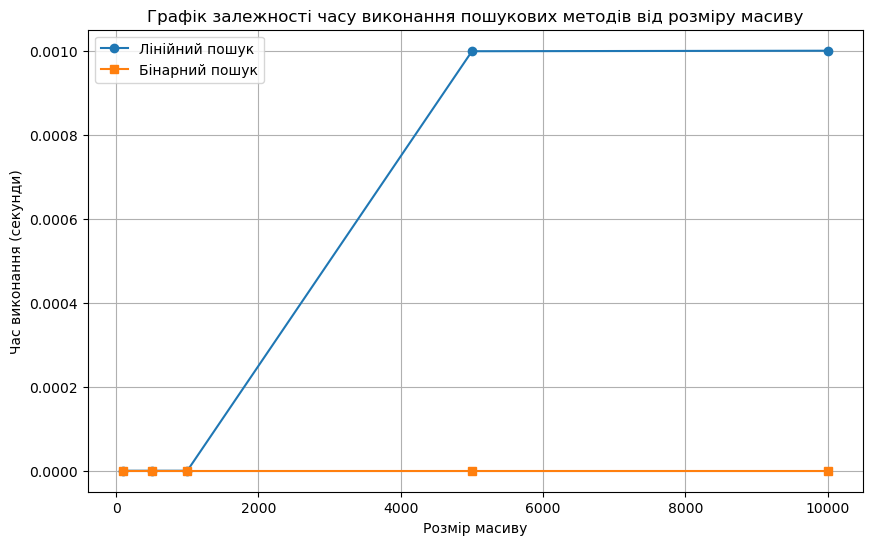

In [14]:
import time
import matplotlib.pyplot as plt

def linear_search(a_list, x):
    i, length = 0, len(a_list)
    start_time = time.time()
    while i < length and x != a_list[i]:
        i += 1
    return i if i < length else -1   

def bin_search(a_list, x, left, right):
    if left > right or len(a_list) == 0:
        return -1
    middle = (left + right) // 2
    if a_list[middle] == x:
        return middle
    elif (a_list[middle] < x):
        return bin_search(a_list, x, middle + 1, right)
    else:       # a_list[middle] > x
        return bin_search(a_list, x, left, middle - 1)

def measure_linear_search(n):
    a_list = list(range(n))
    start_time = time.time()
    x = n + 1
    linear_search(a_list, x)
    end_time = time.time()
    return end_time - start_time

def measure_bin_search(n):
    a_list = list(range(n))
    start_time = time.time()
    x = n + 1
    left, right = 0, len(a_list) - 1
    bin_search(a_list, x, left, right)
    end_time = time.time()
    return end_time - start_time


array_sizes = [100, 500, 1000, 5000, 10000]


linear_search_times = [measure_linear_search(n) for n in array_sizes]
bin_search_times = [measure_bin_search(n) for n in array_sizes]


plt.figure(figsize=(10, 6))
plt.plot(array_sizes, linear_search_times, label='Лінійний пошук', marker='o')
plt.plot(array_sizes, bin_search_times, label='Бінарний пошук', marker='s')
plt.xlabel('Розмір масиву')
plt.ylabel('Час виконання (секунди)')
plt.title('Графік залежності часу виконання пошукових методів від розміру масиву')
plt.legend()
plt.grid(True)
plt.show()

* оцінити, який з двох алгоритмів є більш ефективним та в якому діапазоні розміру задачі.

__Відповідь:__

Згідно графіку, бінарний пошук є більш ефективним для великих розмірів масивів, особливо коли масиви вже відсортовані. Для невеликих розмірів масивів, коли асимптотична складність має менший вплив, лінійний пошук може бути ефективнішим.

## Завдання на лабораторну роботу

1. Створити Notebook-документ за допомогою Jupyter Notebook. (Див. [тут](https://devpractice.ru/python-lesson-1-install/), [тут](https://devpractice.ru/python-lesson-6-work-in-jupyter-notebook/) і [тут](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html)) і  реалізувати контрольні приклади, що розглядаються у даній роботі та виконати завдання, що винесено на самостійну роботу.

1. Дати відповіді на контрольні запитання.

1. Робочий документ оформити у вигляді Notebook-документу (файл __.ipynb__).

1. Скомпілювати звіт у форматі __.html__. Для цього необхідно завантажити термінал і у командному рядку запустити наступну команду:

`jupyter nbconvert lab_4_StudentLasName.ipynb --to html`

1. Представити звіт у вигляді архіву. Проект має складатися мінімум з двох файлів: `lab_4_StudentLasName.ipynb` та `lab_4_StudentLasName.html`

## Контрольні запитання

__1.__ Дати визначення складності задачі з символом $\Omega$.

__Відповідь:__

 Символ $\Omega$ використовується для визначення нижньої межі складності алгоритму.

Формально, складність задачі описується за допомогою $\Omega$, якщо для даного алгоритму існує функція f(n), то вона описує мінімальну кількість операцій або ресурсів, яка потрібна для вирішення задачі, коли розмір вхідних даних зростає.


__2.__ Функція часової складності має вигляд: $F(N)=N^3+7N^2-14N$. Як записати асимптотичну складність в нотації $O()$?

__Відповідь:__

Асимтотична складність = $O(n^3)$

__3.__ Функція часової складності має вигляд: $F(N)=1.01^N+N^{10}$. Як записати аисмптотичну складність в нотації $O()$?

__Відповідь:__

Асимтотична складність = $1.01^n$

__4.__ Функція часової складності має вигляд: $F(N)=N^{1.3}+10log_2N$. Як записати аисмптотичну складність в нотації $O()$?

__Відповідь:__

Асимтотична складність = $O(n^{1.3})$, бо $10log_2N$ буде зростати повільніше

__5.__ У чому полягає ідея розпараллелювання обчислень і для чого вона використовується? Які з алгоритмів, наведених у даній лаораторній роботі дозволяють можливість розпаралелювання?

__Відповідь:__

Ідея розпаралелювання обчислень полягає в поділі обчислювальних задач на підзадачі, які можуть виконуватися одночасно на кількох процесорах або ядрах. Це дозволяє зменшити загальний час виконання задачі, підвищуючи ефективність використання обчислювальних ресурсів.

У цій лабораторній роботі розпаралелення можно використовувати нбінарному пошукуям.

__6.__ Які існують шляхи підвищення обчислювальної швидкості алгоритмів? Який з них є найбільш ефективним?

__Відповідь:__

Розпаралелювання, підвищення продуктивності комп'ютера, оновлення комплектуючих, пониження асимптотичної складності, оптимізація коду, зменшення обсягу даних, оптимізація алгоритму. Але оптимізація алгоритмів та ефективне використання розпаралелювання є ключовими для покращення продуктивності.

## References

1. [Anaconda (Python distribution).](https://uk.wikipedia.org/wiki/Anaconda_(Python_distribution))
1. [Conda.](https://conda.io/en/latest/)
1. [Научно-издательская система Quarto.](https://data-visualization-blog.netlify.app/posts/quarto/)
1. [Callout Blocks. Markdown Syntax.](https://quarto.org/docs/authoring/callouts.html)
1. [Алгоритми та структури даних на Pythob](https://github.com/yorko/python_intro)